In [37]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# If we want to consider inf and -inf to be “NA” in computations, we can set 
pd.options.mode.use_inf_as_na = True

In [2]:
train_df = pd.read_csv('data/aps_failure_training_set.csv', skiprows=range(0, 20))
test_df = pd.read_csv('data/aps_failure_test_set.csv', skiprows=range(0, 20))

In [3]:
# replace classes neg to 0, pos to 1
# alternative index accesing train_df.iloc[:,0]
train_df['class'] = train_df['class'].str.replace('neg','0')
train_df['class'] = train_df['class'].str.replace('pos','1')
cols = train_df.columns
train_df[cols] = train_df[cols].apply(pd.to_numeric, errors='coerce')

test_df['class'] = test_df['class'].str.replace('neg','0')
test_df['class'] = test_df['class'].str.replace('pos','1')
cols = test_df.columns
test_df[cols] = test_df[cols].apply(pd.to_numeric, errors='coerce')

In [4]:
# split dataframe into two arrays
cols = train_df.columns.drop('class')
X_train = train_df[cols].values
X_test = test_df[cols].values

# labels
y_train = train_df['class'].values
y_test = test_df['class'].values

In [5]:
# Create our imputer to replace missing values with the mean e.g.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
# strategy = {mean, median, most_frequent}

imp_train = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_train = imp_train.fit(X_train)
imp_test = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_test = imp_test.fit(X_test)
# Impute each train and test item, then predict
X_train_imp = imp_train.transform(X_train)
X_test_imp = imp_test.transform(X_test)

### Estimate optimal number of features

In [6]:
Cost_1 = 10 
Cost_2 = 500
columns = []
costs = []
times_reduce = []
times_train = []
times_pred = []
_ , column = X_train.shape

while column > 0:
    #     dimention reduction 
    t0 = time()
    X_train_new = SelectKBest(chi2, k=column).fit_transform(X_train_imp, y_train)
    X_test_new = SelectKBest(chi2, k=column).fit_transform(X_test_imp, y_test)
    times_reduce.append(round(time()-t0, 3))
    
    #     train model
    t1 = time()
    neigh = KNeighborsClassifier(n_neighbors=5)
    n_clf = neigh.fit(X_train_new, y_train) 
    times_train.append(round(time()-t1, 3))

    #     test model
    t2 = time()
    y_pred = n_clf.predict(X_test_new)
    times_pred.append(round(time()-t2, 3))

    #     model evaluation
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    FP = cnf_matrix[0, 1]
    FN = cnf_matrix[1, 0]    
    Total_cost = (Cost_1*FP + Cost_2*FN)/len(y_pred)
    columns.append(column)
    costs.append(Total_cost)
    print("Total cost:", Total_cost, "Dimentions:", column, "Iter time:", round(time()-t0, 3), "s")
    column = column - 1

Total cost: 6.560625 Dimentions: 170 Iter time: 59.381 s
Total cost: 6.560625 Dimentions: 169 Iter time: 58.275 s
Total cost: 6.560625 Dimentions: 168 Iter time: 57.357 s
Total cost: 7.215625 Dimentions: 167 Iter time: 90.375 s
Total cost: 7.58125 Dimentions: 166 Iter time: 122.057 s
Total cost: 6.681875 Dimentions: 165 Iter time: 103.822 s
Total cost: 7.67125 Dimentions: 164 Iter time: 112.634 s
Total cost: 10.980625 Dimentions: 163 Iter time: 105.305 s
Total cost: 10.724375 Dimentions: 162 Iter time: 95.47 s
Total cost: 10.980625 Dimentions: 161 Iter time: 103.36 s
Total cost: 6.68125 Dimentions: 160 Iter time: 85.155 s
Total cost: 7.099375 Dimentions: 159 Iter time: 85.199 s
Total cost: 7.396875 Dimentions: 158 Iter time: 77.576 s
Total cost: 11.005 Dimentions: 157 Iter time: 97.468 s
Total cost: 10.600625 Dimentions: 156 Iter time: 89.459 s
Total cost: 10.600625 Dimentions: 155 Iter time: 89.312 s
Total cost: 6.560625 Dimentions: 154 Iter time: 45.013 s
Total cost: 7.396875 Dimenti

Total cost: 6.815 Dimentions: 22 Iter time: 11.201 s
Total cost: 6.87625 Dimentions: 21 Iter time: 10.99 s
Total cost: 6.891875 Dimentions: 20 Iter time: 13.634 s
Total cost: 7.130625 Dimentions: 19 Iter time: 10.235 s
Total cost: 7.130625 Dimentions: 18 Iter time: 8.812 s
Total cost: 7.163125 Dimentions: 17 Iter time: 9.482 s
Total cost: 7.8175 Dimentions: 16 Iter time: 15.975 s
Total cost: 7.256875 Dimentions: 15 Iter time: 8.013 s
Total cost: 8.21125 Dimentions: 14 Iter time: 11.634 s
Total cost: 7.450625 Dimentions: 13 Iter time: 7.274 s
Total cost: 7.521875 Dimentions: 12 Iter time: 7.255 s
Total cost: 7.418125 Dimentions: 11 Iter time: 6.774 s
Total cost: 8.20375 Dimentions: 10 Iter time: 6.94 s
Total cost: 8.54625 Dimentions: 9 Iter time: 6.514 s
Total cost: 7.56375 Dimentions: 8 Iter time: 4.314 s
Total cost: 7.978125 Dimentions: 7 Iter time: 3.575 s
Total cost: 7.864375 Dimentions: 6 Iter time: 3.896 s
Total cost: 9.3875 Dimentions: 5 Iter time: 2.796 s
Total cost: 10.0775 Dim

Populating the interactive namespace from numpy and matplotlib


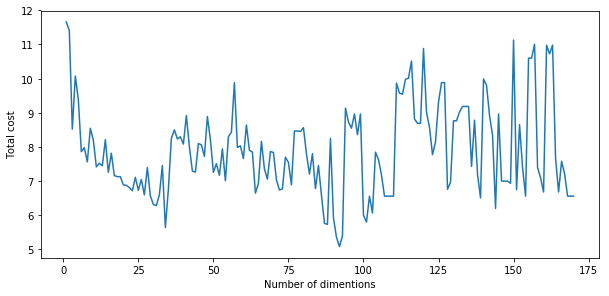

In [39]:
 %pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
ax = plt.subplot(211)
ax.plot(columns, costs)
plt.ylabel('Total cost')
plt.xlabel('Number of dimentions')
plt.show()

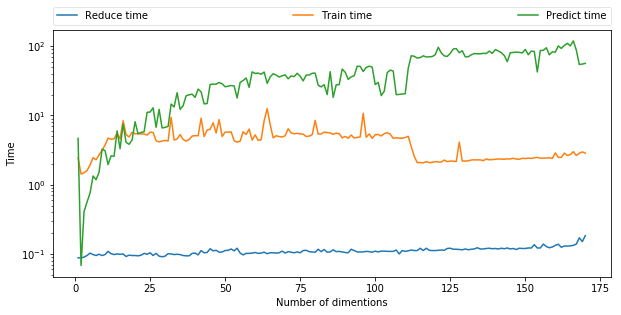

In [40]:
pylab.rcParams['figure.figsize'] = (10, 10)
ax = plt.subplot(211)
ax.plot(columns, times_reduce,  label="Reduce time")
ax.plot(columns, times_train, label="Train time")
ax.plot(columns, times_pred, label="Predict time")
ax.set_yscale('log')
leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
leg.get_frame().set_alpha(0.5)
plt.ylabel('Time')
plt.xlabel('Number of dimentions')
plt.show()

In [41]:
# number features with min cost
k = columns[costs.index(min(costs))]
k

92

In [42]:
# select features
X_train = SelectKBest(chi2, k=k).fit_transform(X_train_imp, y_train)
X_test = SelectKBest(chi2, k=k).fit_transform(X_test_imp, y_test)

In [43]:
print('Class distribution of the training set: {}'.format(Counter(y_train)))

Class distribution of the training set: Counter({0: 59000, 1: 1000})


### KNeighborsClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [44]:
neigh = KNeighborsClassifier(n_neighbors=5)
n_clf = neigh.fit(X_resampled, y_resampled) 
y_pred = n_clf.predict(X_test)

## Evaluation

In [45]:
acc = metrics.accuracy_score(y_pred, y_test)
print ("accuracy_score:", acc)

accuracy_score: 0.9594375


In [46]:
print('test labels: \n', pd.Series(y_test).value_counts())
print('predicted labels: \n', pd.Series(y_pred).value_counts())

test labels: 
 0    15625
1      375
dtype: int64
predicted labels: 
 0    15084
1      916
dtype: int64


In [47]:
# calculate null accuracy (for binary classification problems coded as 0/1)# calcul 
max(y_test.mean(), 1 - y_test.mean())

0.9765625

Classification accuracy is the easiest classification metric to understand<br>
But, it does not tell you the underlying distribution of response values<br>
And, it does not tell you what "types" of errors your classifier is making<br>

Confusion matrix, without normalization
[[15030   595]
 [   54   321]]
Normalized confusion matrix
[[0.96 0.04]
 [0.14 0.86]]


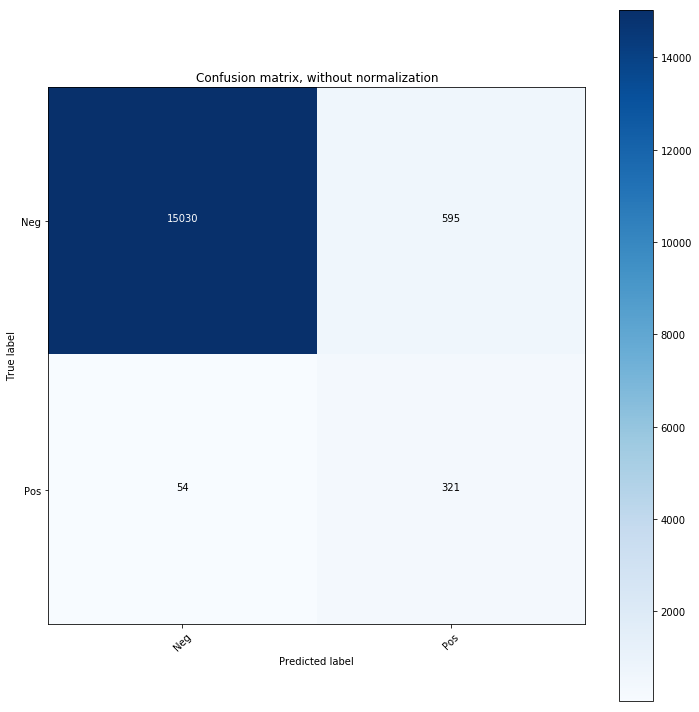

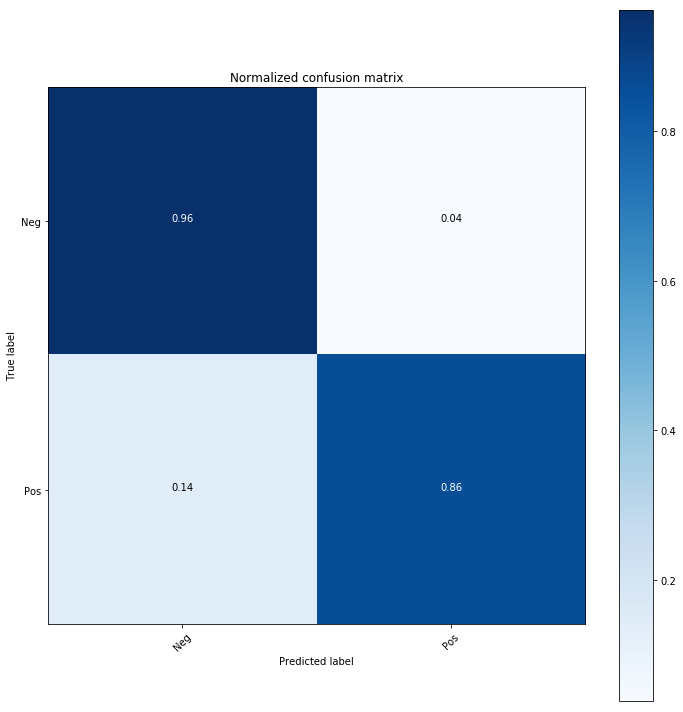

In [48]:
# Compute confusion matrix to evaluate the accuracy of a Random Forest Training classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = (['Neg', 'Pos'])
   
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

+ Every observation in the testing set is represented in exactly one box
+ It's a 2x2 matrix because there are 2 response classes
+ The format shown here is not universal

Basic terminology <br>

+ True Positives (TP): we correctly predicted that there is some failure
+ True Negatives (TN): we correctly predicted that there is no failure
+ False Positives (FP): we incorrectly predicted that there is some failure (a "Type I error")
+ False Negatives (FN): we incorrectly predicted that there is no failure (a "Type II error")

In [49]:
# save confusion matrix and slice into four pieces
confusion = cnf_matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP, TN, FP, FN)

321 15030 595 54


In [50]:
# Costs
# To minimize costs
Cost_1 = 10 
Cost_2 = 500
Total_cost = (Cost_1*FP + Cost_2*FN)/len(y_pred)

print("Total cost:", Total_cost)

Total cost: 2.059375


## Metrics computed from a confusion matrix¶
#### Classification Accuracy: Overall, how often is the classifier correct?

In [51]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.9594375
0.9594375


#### Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [52]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.0405625
0.040562499999999946


#### Sensitivity: When the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"

In [53]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.856
0.856


#### Specificity: When the actual value is negative, how often is the prediction correct?

+ How "specific" (or "selective") is the classifier in predicting positive instances?

In [54]:
print(TN / float(TN + FP))

0.96192


#### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [55]:
print(FP / float(TN + FP))

0.03808


#### Precision: When a positive value is predicted, how often is the prediction correct?

+ How "precise" is the classifier when predicting positive instances?

In [56]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.35043668122270744
0.35043668122270744


#### Conclusion:

+ Confusion matrix gives you a more complete picture of how your classifier is performing
+ Also allows you to compute various classification metrics, and these metrics can guide your model selection

#### Which metrics should you focus on?

+ Choice of metric depends on your business objective
+ Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to + the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
+ Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)